# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Definindo o período
fim = datetime.today()
inicio = fim - timedelta(days=2*365)  # aproximadamente 2 anos

# Lista de ativos (símbolos do Yahoo Finance)
ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']

# Baixar os dados
dados = {}
for ativo in ativos:
    df = yf.download(ativo, start=inicio.strftime('%Y-%m-%d'), end=fim.strftime('%Y-%m-%d'))
    dados[ativo] = df
    print(f"{ativo} baixado com sucesso.")

# Opcional: salvar os dados em CSV
for ativo, df in dados.items():
    df.to_csv(f"{ativo}_historico.csv")
    print(f"{ativo} salvo como CSV.")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


PETR4.SA baixado com sucesso.


[*********************100%***********************]  1 of 1 completed


VALE3.SA baixado com sucesso.


[*********************100%***********************]  1 of 1 completed

ITUB4.SA baixado com sucesso.
PETR4.SA salvo como CSV.
VALE3.SA salvo como CSV.
ITUB4.SA salvo como CSV.


#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PETR4.SA baixado e salvo com sucesso.
VALE3.SA baixado e salvo com sucesso.
ITUB4.SA baixado e salvo com sucesso.


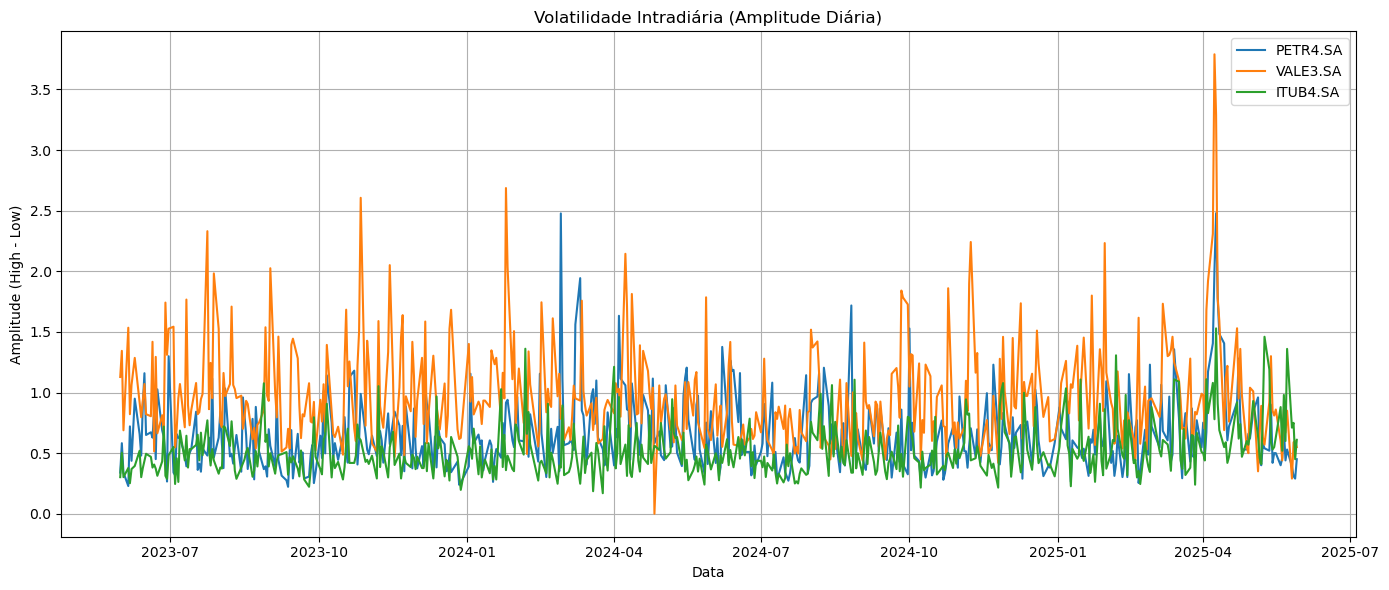


Média da amplitude diária (volatilidade):
PETR4.SA: 0.64
VALE3.SA: 0.97
ITUB4.SA: 0.52


In [4]:
import os
import matplotlib.pyplot as plt

fim = datetime.today()
inicio = fim - timedelta(days=2*365)

ativos = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']

dados = {}
os.makedirs("dados_ativos", exist_ok=True)

for ativo in ativos:
    df = yf.download(ativo, start=inicio.strftime('%Y-%m-%d'), end=fim.strftime('%Y-%m-%d'))
    df['Amplitude'] = df['High'] - df['Low']
    dados[ativo] = df
    df.to_csv(f"dados_ativos/{ativo}_historico.csv")
    print(f"{ativo} baixado e salvo com sucesso.")

plt.figure(figsize=(14, 6))
for ativo, df in dados.items():
    plt.plot(df.index, df['Amplitude'], label=ativo)

plt.title('Volatilidade Intradiária (Amplitude Diária)')
plt.xlabel('Data')
plt.ylabel('Amplitude (High - Low)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nMédia da amplitude diária (volatilidade):")
for ativo, df in dados.items():
    media = df['Amplitude'].mean()
    print(f"{ativo}: {media:.2f}")

O ativo VALE3.SA apresentou a maior volatilidade intradiária entre os três, com uma média de 0.97 reais de variação entre o valor máximo e mínimo dentro do dia, nos últimos 2 anos.